In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_excel("Final data.xlsx")

In [40]:
df.head()

,Invoice ID,Branch_ID,City,Branch,Address,Employee,Employee_ID,Customer type,Gender,Product,...,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income
0,898-04-2717,A,Tema,Tema,"Krakue Rd,Tema",Abigail Gakpo,A77535,Normal,Male,Socks,...,76.40,9,34.3800,721.9800,2019-03-19,15:49:00,Ewallet,687.60,4.761905,34.3800
1,896-34-0956,A,Tema,Tema,"Krakue Rd,Tema",Sandra Tepey,S32468,Normal,Male,Hat,...,21.32,1,1.0660,22.3860,2019-03-20,12:43:00,Cash,21.32,4.761905,1.0660
2,895-66-0685,B,Accra,Achimota,Achimota-Kumasi National Highway,Esther Osei,E24686,Member,Male,Savana Dry Cider 330ml,...,18.08,3,2.7120,56.9520,2019-03-21,19:46:00,Ewallet,54.24,4.761905,2.7120
3,895-03-6665,B,Accra,Achimota,Achimota-Kumasi National Highway,Jane Amofa,J18643,Normal,Female,Lipstick,...,36.51,9,16.4295,345.0195,2019-03-22,10:52:00,Cash,328.59,4.761905,16.4295
4,894-41-5205,C,Kumasi,Ahodwo,"Melcom Road,Kumasi",Akua Pokuase,K63578,Normal,Female,GRANORO SPAGHETTI RISTORANTI 500G,...,43.18,8,17.2720,362.7120,2019-03-23,19:39:00,Credit card,345.44,4.761905,17.2720


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               199 non-null    object        
 1   Branch_ID                199 non-null    object        
 2   City                     199 non-null    object        
 3   Branch                   199 non-null    object        
 4   Address                  199 non-null    object        
 5   Employee                 199 non-null    object        
 6   Employee_ID              199 non-null    object        
 7   Customer type            199 non-null    object        
 8   Gender                   199 non-null    object        
 9   Product                  198 non-null    object        
 10  Product_ID               199 non-null    int64         
 11  Product line             199 non-null    object        
 12  Unit price               199 non-nul

In [42]:
df.describe()

,Product_ID,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income
count,199.000000,199.000000,199.00000,199.000000,199.000000,199.000000,1.990000e+02,199.000000
mean,483.884422,88.283869,5.61809,21.483568,1203.831392,312.229497,4.761905e+00,15.611475
std,294.819328,289.623074,2.92928,83.431754,10624.322471,239.992835,2.047962e-14,11.999642
min,1.000000,10.170000,1.00000,0.508500,10.678500,10.170000,4.761905e+00,0.508500
25%,216.000000,30.935000,3.00000,6.299000,132.279000,125.980000,4.761905e+00,6.299000
50%,471.000000,57.220000,5.00000,12.245000,258.678000,244.200000,4.761905e+00,12.210000
75%,742.500000,81.010000,8.00000,22.806500,489.352500,455.130000,4.761905e+00,22.756500
max,992.000000,2961.000000,10.00000,1180.350000,148689.000000,993.000000,4.761905e+00,49.650000


In [53]:
import matplotlib.pyplot as plt
import datetime as dt
pd.set_option("display.float_format", lambda x: '%.3f' % x)


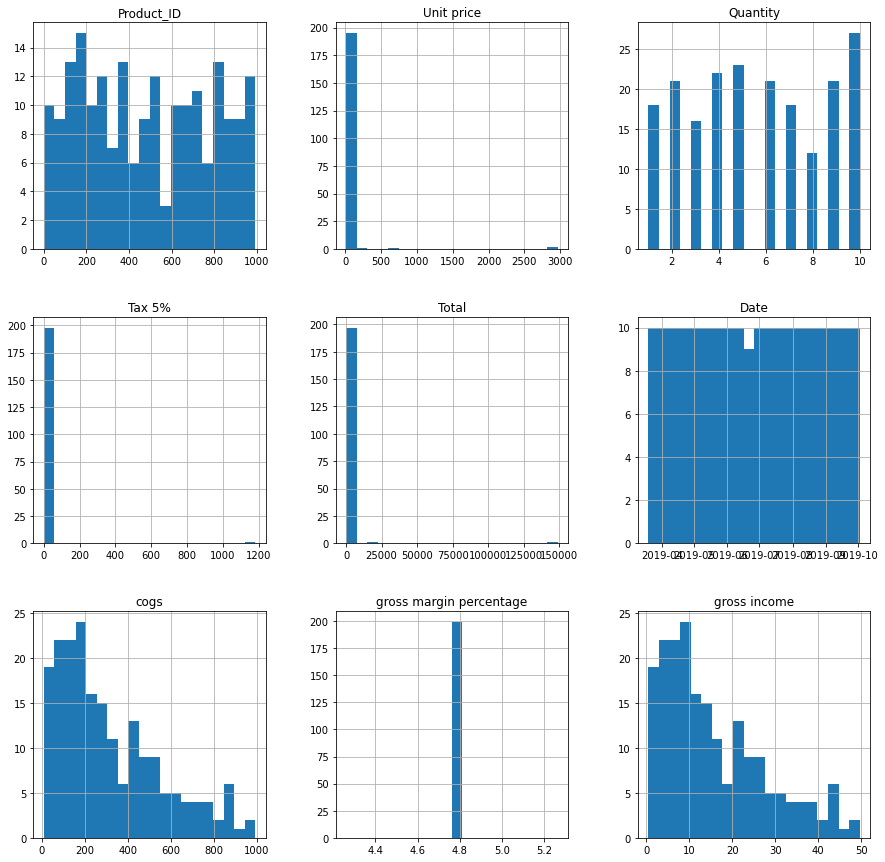

In [54]:
axList = df.hist(bins=20, figsize = (15, 15))
plt.savefig("Hist.png")

In [55]:
# dropna() command will help to drop the null values from the data.
df.dropna(inplace = True)

# Lets check the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Product_ID,198.000,481.424,293.512,1.000,213.000,469.500,741.000,992.000
Unit price,198.000,88.295,290.357,10.170,30.527,56.890,80.555,2961.000
Quantity,198.000,5.636,2.925,1.000,3.000,5.500,8.000,10.000
Tax 5%,198.000,21.549,83.638,0.508,6.274,12.281,22.823,1180.350
Total,198.000,1208.998,10651.003,10.678,131.743,259.938,491.767,148689.000
cogs,198.000,312.936,240.393,10.170,125.470,244.550,455.295,993.000
gross margin percentage,198.000,4.762,0.000,4.762,4.762,4.762,4.762,4.762
gross income,198.000,15.647,12.020,0.508,6.274,12.227,22.765,49.650


In [56]:
# Before the start we should convert the InvoiceDate to date with the datetime library.

df["Date"] = pd.to_datetime(df["Date"])

In [60]:
# Now, to find out the Recency value of the customers we should know the last order day in the data and make the analysis after the last day + 1 day.

last_day = df["Date"].max()
today_date = dt.datetime(last_day.year, last_day.month, last_day.day + 1)

In [61]:
df["CustomerID"] = np.arange(0,198)

In [62]:
# Recency: Analysis date - last order day of the customer.
# Frequency: Total invoice amount the customer
# Monetary: Total price that spent by customer for each orders.



rfm = df.groupby("CustomerID").agg({"Date": lambda date: (today_date - date.max()).days,
                                     'Invoice ID': lambda num: num.nunique(),
                                     'Total': "sum"})

In [63]:
# Lets change the rfm columns to understandable.

rfm.columns = ["recency", "frequency", "monetary"]
rfm.head()

,recency,frequency,monetary
CustomerID,,,
0,198,1,721.980
1,197,1,22.386
2,196,1,56.952
3,195,1,345.019
4,194,1,362.712


In [64]:
rfm = rfm[rfm["monetary"] >0]

In [65]:
# According RFM Analysis Model we should to prepare the segmentions for the each metrics below.

rfm["recency_score"] = pd.qcut(rfm["recency"], 5, labels = [5,4,3,2,1])
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method = "first"), 5, labels = [1,2,3,4,5])
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels = [1,2,3,4,5])
rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) + rfm["monetary_score"].astype(str))

rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
CustomerID,,,,,,,
0,198,1,721.980,1,1,5,15
1,197,1,22.386,1,1,1,11
2,196,1,56.952,1,1,1,11
3,195,1,345.019,1,1,4,14
4,194,1,362.712,1,1,4,14


In [66]:
# Then we can make understandable each segment definition below.

seg_map = {r'[1-2][1-2]': "hibernating",
        r'[1-2][3-4]': "at_Risk",
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential,loyalists',
        r'5[4-5]': 'champions'
          }

# Assign of the segments
rfm["segment"] = rfm["RFM_SCORE"].replace(seg_map, regex = True)
rfm.head()


,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
CustomerID,,,,,,,,
0,198,1,721.980,1,1,5,15,cant_loose
1,197,1,22.386,1,1,1,11,hibernating
2,196,1,56.952,1,1,1,11,hibernating
3,195,1,345.019,1,1,4,14,at_Risk
4,194,1,362.712,1,1,4,14,at_Risk


In [67]:
# To understand the distribution of the each segmentation we can use the groupby.

print(rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"]))

                    recency       frequency       monetary      
                       mean count      mean count     mean count
segment                                                         
about_to_sleep      104.429    14     1.000    14   94.148    14
at_Risk             155.889    27     1.000    27  353.369    27
cant_loose          163.857    21     1.000    21 8963.621    21
champions            21.533    15     1.000    15  621.237    15
hibernating         158.419    31     1.000    31  102.987    31
loyal_customers      82.871    31     1.000    31  563.013    31
need_attention       94.286     7     1.000     7  274.933     7
new_customers        20.000     5     1.000     5   56.595     5
potential,loyalists  40.333    39     1.000    39  197.545    39
promising            56.625     8     1.000     8   51.271     8


In [69]:
df['Branch'].value_counts()

Tema        78
Achimota    63
Ahodwo      57
Name: Branch, dtype: int64

<AxesSubplot:xlabel='Branch', ylabel='count'>

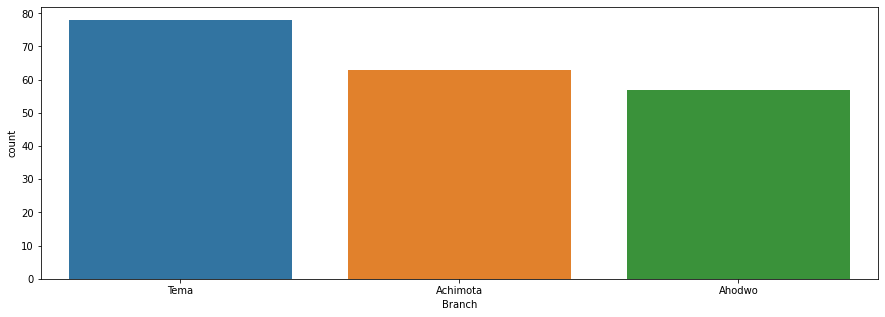

In [71]:
plt.figure(figsize=(15,5))
sns.countplot(x='Branch',data=df)

In [72]:
df["City"].value_counts()

Tema      78
Accra     63
Kumasi    57
Name: City, dtype: int64

<AxesSubplot:title={'center':'Cities count'}, ylabel='City'>

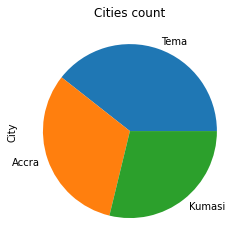

In [74]:

df["City"].value_counts().plot.pie(title='Cities count')

In [75]:
df.groupby('City')['Branch'].value_counts()

City    Branch  
Accra   Achimota    63
Kumasi  Ahodwo      57
Tema    Tema        78
Name: Branch, dtype: int64

<AxesSubplot:title={'center':'Each city with branch count'}, ylabel='City,Branch'>

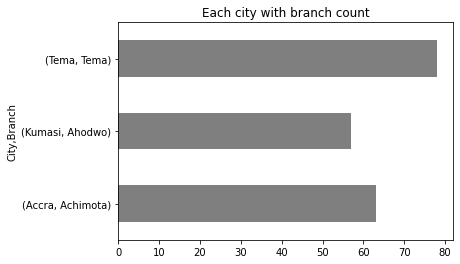

In [80]:
df.groupby('City')['Branch'].value_counts().plot.barh(color='black',alpha=0.5,title='Each city with branch count')

In [81]:
df['Customer type'].value_counts()

Normal    103
Member     95
Name: Customer type, dtype: int64

<AxesSubplot:title={'center':'Customer type count'}>

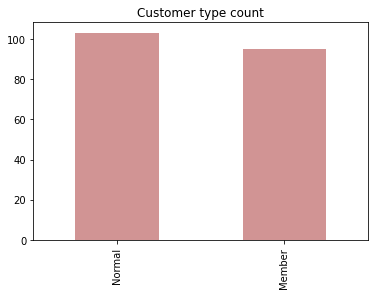

In [83]:
df['Customer type'].value_counts().plot.bar(color='brown',alpha=0.5,title='Customer type count')

In [86]:
# What about gender ?
label=df['Gender'].unique()
values=df['Gender'].value_counts().values

In [87]:
df['Gender'].value_counts()

Female    103
Male       95
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Males VS Females')

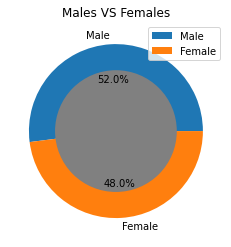

In [88]:
plt.pie(values,autopct='%1.1f%%',labels=label)
plt.legend()
centre_circle = plt.Circle((0, 0), 0.70, fc='grey')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Males VS Females')

In [89]:
#From the previous note, what is the relationship between the gender and the client type?¶
df.groupby('Gender')["Customer type"].value_counts()

Gender  Customer type
Female  Member           53
        Normal           50
Male    Normal           53
        Member           42
Name: Customer type, dtype: int64

Text(0.5, 1.0, 'Gender with customer type ')

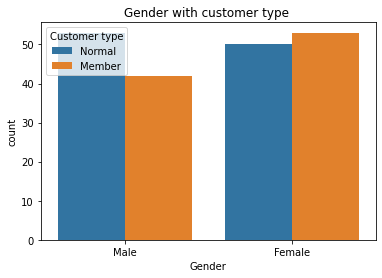

In [90]:
sns.countplot(x='Gender',hue='Customer type',data=df)
plt.title('Gender with customer type ')

In [91]:
#What are the production lines and what about the price information for each production line?¶
df['Product line'].unique()

array(['Fashion accessories', 'Food and beverages', 'Home and lifestyle',
       'Sports and travel', 'Electronic accessories', 'Health and beauty'],
      dtype=object)

In [95]:
import plotly.express as px

In [99]:
figure=px.box(df,x='Product line',color='Product line',y='City',template='plotly_dark',title='Product line with City')
figure.show()

In [101]:
#Information about the 5% tax for each production line !¶
figure=px.box(df,x='Product line',color='Product line',y='Tax 5%',template='plotly_dark',title='Product line with tax 5%')
figure.show()

In [102]:
df['Payment'].value_counts()

Credit card    68
Ewallet        67
Cash           63
Name: Payment, dtype: int64

<AxesSubplot:title={'center':'Payment count & types'}, ylabel='Payment'>

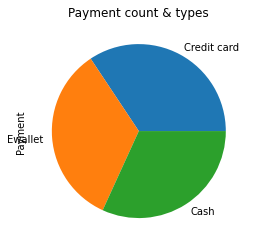

In [103]:
df['Payment'].value_counts().plot.pie(title='Payment count & types')

In [108]:
#What is the highest gross income for the three branches?¶
df[['Branch','gross income']].groupby('Branch').max()

,gross income
Branch,
Achimota,44.879
Ahodwo,49.650
Tema,44.141


In [110]:
#Gross income for each Product line¶
figure=px.box(df,x='Product line',color='Product line',y='gross income',template='plotly_dark',title='Product line with gross income')
figure.show()